In [1]:
import pandas as pd
import os
from glob import glob
import requests
import zipfile

In [2]:
#Setup paths
currentWorkDir = os.getcwd()

In [3]:
# URL of the file
url = 'https://www.kaggle.com/api/v1/datasets/download/dscclass/phishing'

# Destination path
output_path = f'{currentWorkDir}/dados/phishing.zip'

# Send GET request with redirect support
response = requests.get(url, allow_redirects=True)

# Save the content to the file
with open(output_path, "wb") as f:
    f.write(response.content)

print("Download complete!")


Download complete!


In [4]:
extract_to = f'{currentWorkDir}/dados/Raw'

os.makedirs(extract_to, exist_ok=True)


with zipfile.ZipFile(output_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Files extracted to {extract_to}")

Files extracted to /home/lucasjansen/Desktop/SG_atividade3/dados/Raw


In [5]:
# Primeiramente vamos importar as bibliotecas usadas neste estudo de caso como segue.
import numpy as np #biblioteca com recursos para álgebra linear
import pandas as pd # processamento dos dados, carga de arquivo CSV e de I/O
import json
from sklearn import * 
import sklearn.model_selection as model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate


#import matplotlib.pyplot as plt
#from collections import Counter
#from sklearn.cross_validation import train_test_split

In [6]:
# Nós utilizaremos neste caso, o dataset (conjunto de dados) phishing.csv, disponível aqui pra você.
# A origem deste arquivo csv foi 'https://archive.ics.uci.edu/ml/datasets/phishing+websites'
#
# Primeiro, vamos testar o carregamento do arquivo CSV.
# Não vamos usar com detalhes a biblioteca pandas neste caso, mas esse trecho de código ajuda a entender o arquivo com o conjunto de dados.
df = pd.read_csv(f'{currentWorkDir}/dados/Raw/phishing.csv')
colunas = [
    "having_IP_Address",
    "URL_Length", 
    "Shortining_Service", 
    "having_At_Symbol",
    "double_slash_redirecting", 
    "Prefix_Suffix", 
    "having_Sub_Domain", 
    "SSLfinal_State",
    "Domain_registeration_length", 
    "Favicon", 
    "port", 
    "HTTPS_token", 
    "Request_URL",
    "URL_of_Anchor", 
    "Links_in_tags", 
    "SFH", 
    "Submitting_to_email", 
    "Abnormal_URL",
    "Redirect", 
    "on_mouseover", 
    "RightClick", 
    "popUpWidnow", 
    "Iframe", 
    "age_of_domain",
    "DNSRecord", 
    "web_traffic", 
    "Page_Rank", 
    "Google_Index", 
    "Links_pointing_to_page",
    "Statistical_report", 
    "Result"
]
df.columns = colunas
df.info() #apresenta os metadados do arquivo csv
df.tail(10)
#df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11054 non-null  int64
 1   URL_Length                   11054 non-null  int64
 2   Shortining_Service           11054 non-null  int64
 3   having_At_Symbol             11054 non-null  int64
 4   double_slash_redirecting     11054 non-null  int64
 5   Prefix_Suffix                11054 non-null  int64
 6   having_Sub_Domain            11054 non-null  int64
 7   SSLfinal_State               11054 non-null  int64
 8   Domain_registeration_length  11054 non-null  int64
 9   Favicon                      11054 non-null  int64
 10  port                         11054 non-null  int64
 11  HTTPS_token                  11054 non-null  int64
 12  Request_URL                  11054 non-null  int64
 13  URL_of_Anchor                11054 non-null  i

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
11044,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,0,-1,1,0,1,1
11045,-1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,0,-1,1,1,1,1
11046,-1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11047,1,-1,1,1,1,-1,-1,1,1,1,...,1,1,1,1,0,-1,1,0,1,1
11048,-1,-1,1,1,-1,-1,1,-1,1,1,...,1,1,-1,1,1,-1,1,1,1,-1
11049,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11050,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11051,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11052,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,1,...,1,1,-1,1,-1,-1,-1,1,-1,-1


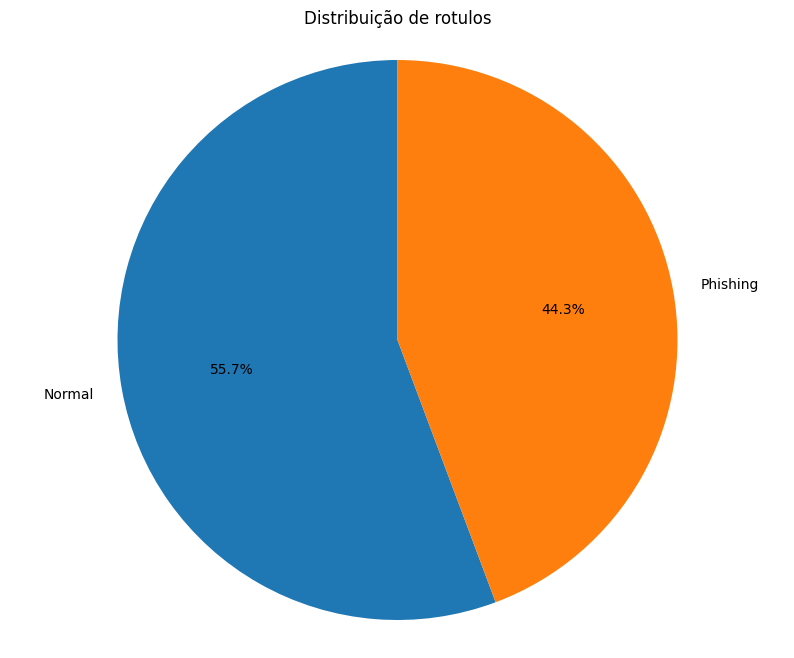

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

PH_maping = {1: 'Normal', -1: 'Phishing'}

# Map and count the values
Phishing_count = df['Result'].map(PH_maping).value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    Phishing_count,
    labels=Phishing_count.index,  # This fixes the missing labels
    autopct='%.1f%%',
    startangle=90
)
plt.title('Distribuição de rotulos')  # Fixed typo: "Destribuicao" → "Distribuição"
plt.axis('equal')  # Ensures the pie is a circle
plt.show()
del Phishing_count


O gráfico de pizza acima representa a distribuição dos rótulos no conjunto de dados utilizado para detecção de phishing. Os rótulos foram mapeados como:

    1 → Normal

    -1 → Phishing

A visualização revela que:

    55.7% dos registros são classificados como "Normal"

    44.3% são classificados como "Phishing"

Essa proporção é relativamente equilibrada, o que é positivo para o treinamento de modelos de classificação, pois reduz o risco de viés para uma das classes. Ainda assim, é importante monitorar o desempenho dos modelos em ambas as categorias, especialmente na detecção de phishing, que é o foco principal da tarefa.

Essa etapa de visualização é essencial para entender o contexto do problema e garantir que os modelos não sejam influenciados por uma distribuição desbalanceada.

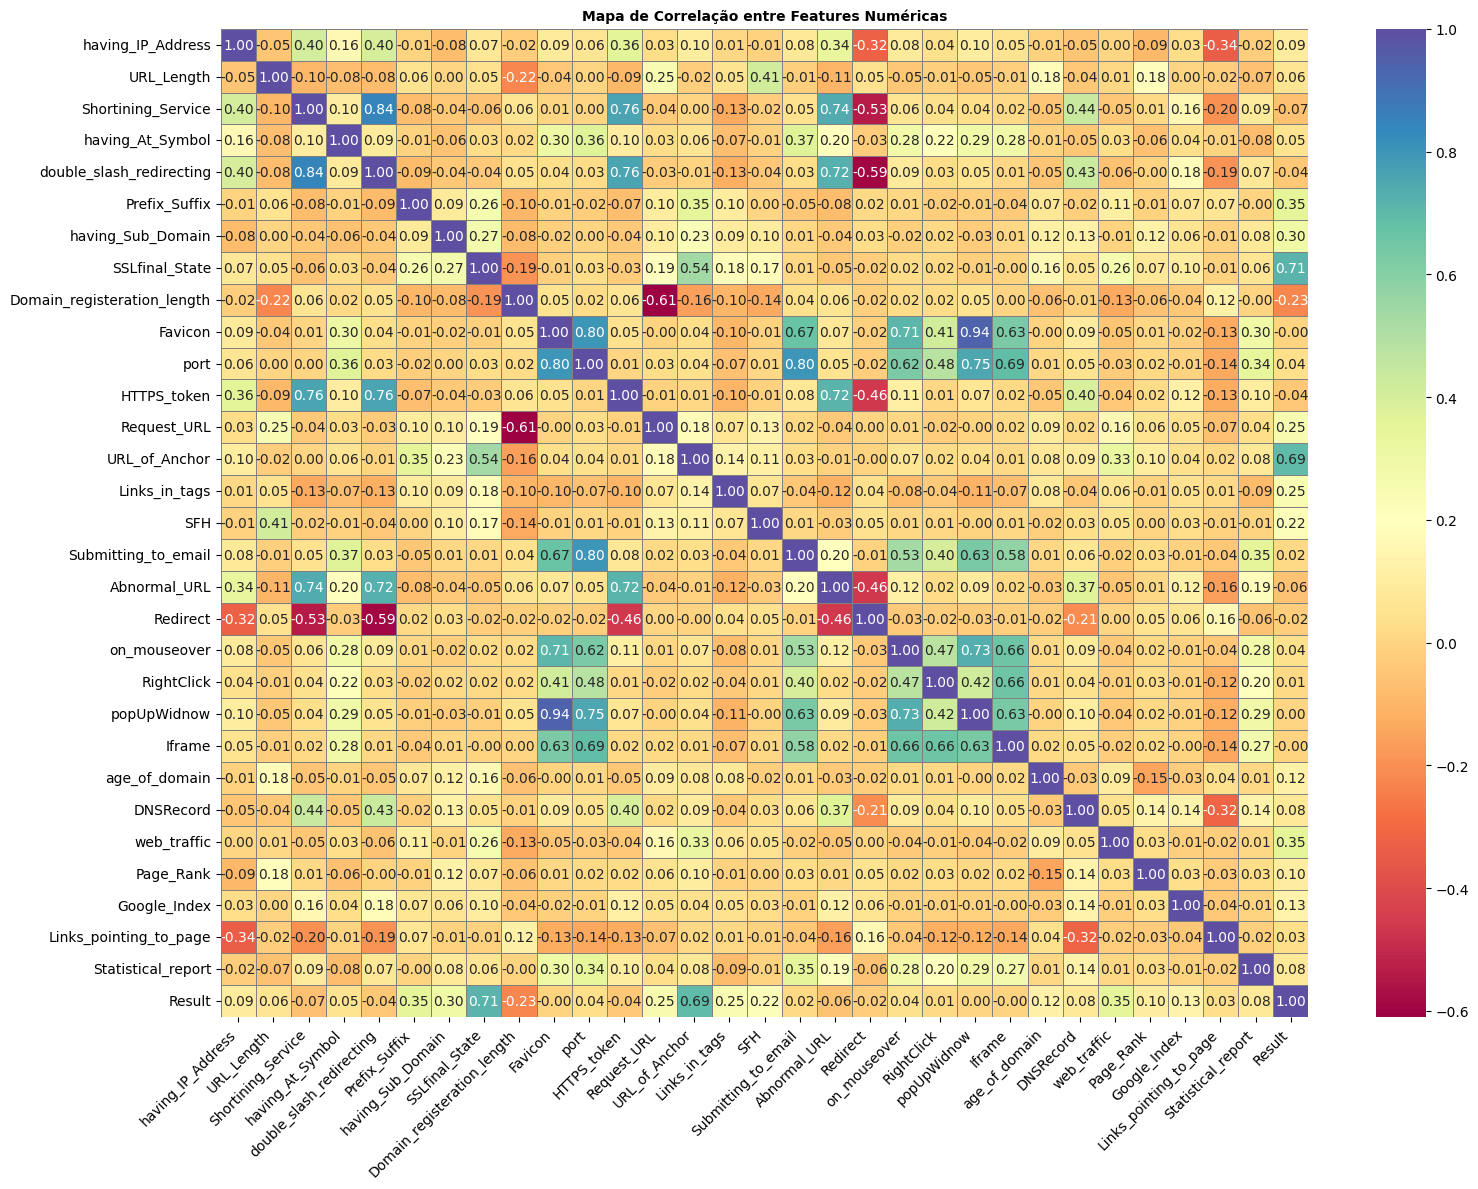

In [39]:
#heatmap de corelacao

# Gera o heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), cmap='Spectral', annot=True, fmt=".2f", linewidths=0.5, linecolor='gray')
plt.title("Mapa de Correlação entre Features Numéricas", fontsize=10, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Mapa de Correlação entre Features Numéricas

O heatmap acima apresenta a correlação de Pearson entre todas as variáveis numéricas do conjunto de dados. Essa visualização é essencial para entender como os atributos se relacionam entre si e com o rótulo de saída (Result), que indica se uma instância é phishing ou normal.
🧠 Interpretação:

    Cores quentes (amarelo) indicam correlação positiva forte (próximo de +1).

    Cores frias (roxo) indicam correlação negativa forte (próximo de -1).

    Valores próximos de 0 indicam pouca ou nenhuma correlação linear.

🔍 Aplicações práticas:

    Seleção de features: atributos com alta correlação com Result podem ser bons candidatos para modelos preditivos.

    Redução de dimensionalidade: variáveis altamente correlacionadas entre si podem ser redundantes.

    Detecção de padrões maliciosos: por exemplo, se o uso de @ ou iframe estiver fortemente correlacionado com phishing, isso pode indicar comportamento suspeito.

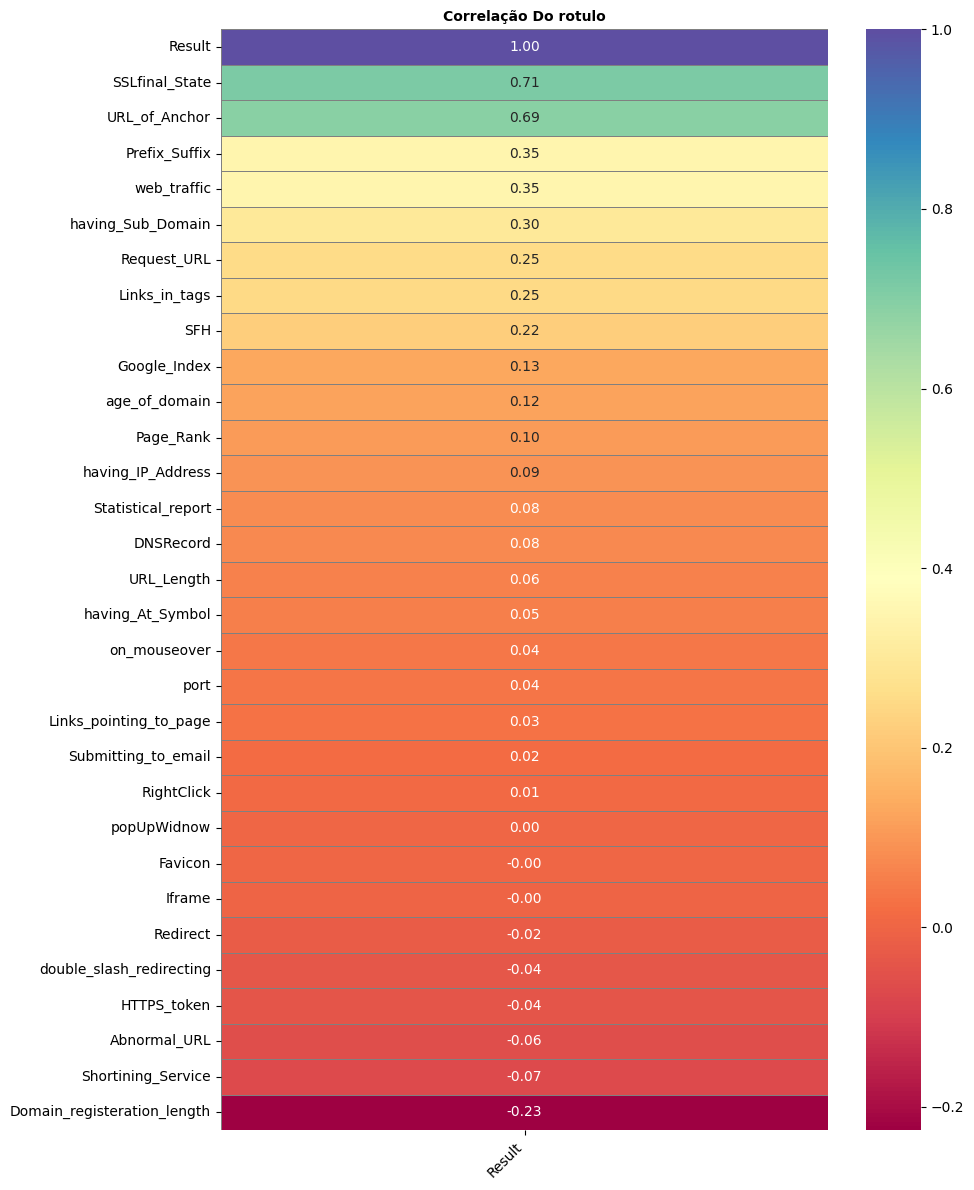

In [ ]:
# heamap de corelacao do rotulo.
plt.figure(figsize=(10, 12))
sns.heatmap(df.corr()[['Result']].sort_values(by='Result',ascending=False),
             cmap='Spectral', annot=True, fmt=".2f", linewidths=0.5, linecolor='gray')
plt.title("Correlação Do rotulo", fontsize=10, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


As variáveis que apresentam maior correlação positiva com o rótulo indicam que, quando seus valores aumentam, há maior probabilidade de a instância ser classificada como normal (Result = 1). Entre elas:

    SSLfinal_State: Essa feature está fortemente associada a sites legítimos. Certificados SSL válidos são um indicativo de segurança, e sua presença tende a sinalizar que o site não é phishing.

    URL_of_Anchor e Request_URL: Ambas estão relacionadas à estrutura dos links dentro da página. Sites legítimos costumam ter âncoras e URLs bem definidas e confiáveis.

    web_traffic: Sites com tráfego elevado geralmente são mais confiáveis, o que justifica sua correlação positiva com o rótulo normal.

    Prefix_Suffix: Refere-se ao uso de hífens no domínio (ex: http://secure-bank-login.com). Esse tipo de estrutura é comum em URLs maliciosas que tentam imitar sites legítimos. A correlação negativa forte sugere que essa característica é um bom indicativo de phishing.

    feature Domain_registration_length: representa o tempo de validade do registro de um domínio — ou seja, por quanto tempo ele está ativo e registrado. No contexto da detecção de phishing, essa variável apresenta uma correlação negativa de aproximadamente -0.23 com o rótulo Result, o que significa que:

    Quanto menor o tempo de registro de um domínio, maior a probabilidade de ele estar associado a um site de phishing.

Essas features são excelentes candidatas para alimentar modelos de classificação, pois ajudam a distinguir padrões legítimos de comportamento.

In [ ]:
corr_matrix = df.corr()
mask = (corr_matrix.loc['Result'] > 0.20) | (corr_matrix.loc['Result'] < -0.20)
columns_to_keep = corr_matrix.columns[mask]
print(columns_to_keep)

Index(['Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'web_traffic', 'Result'],
      dtype='object')


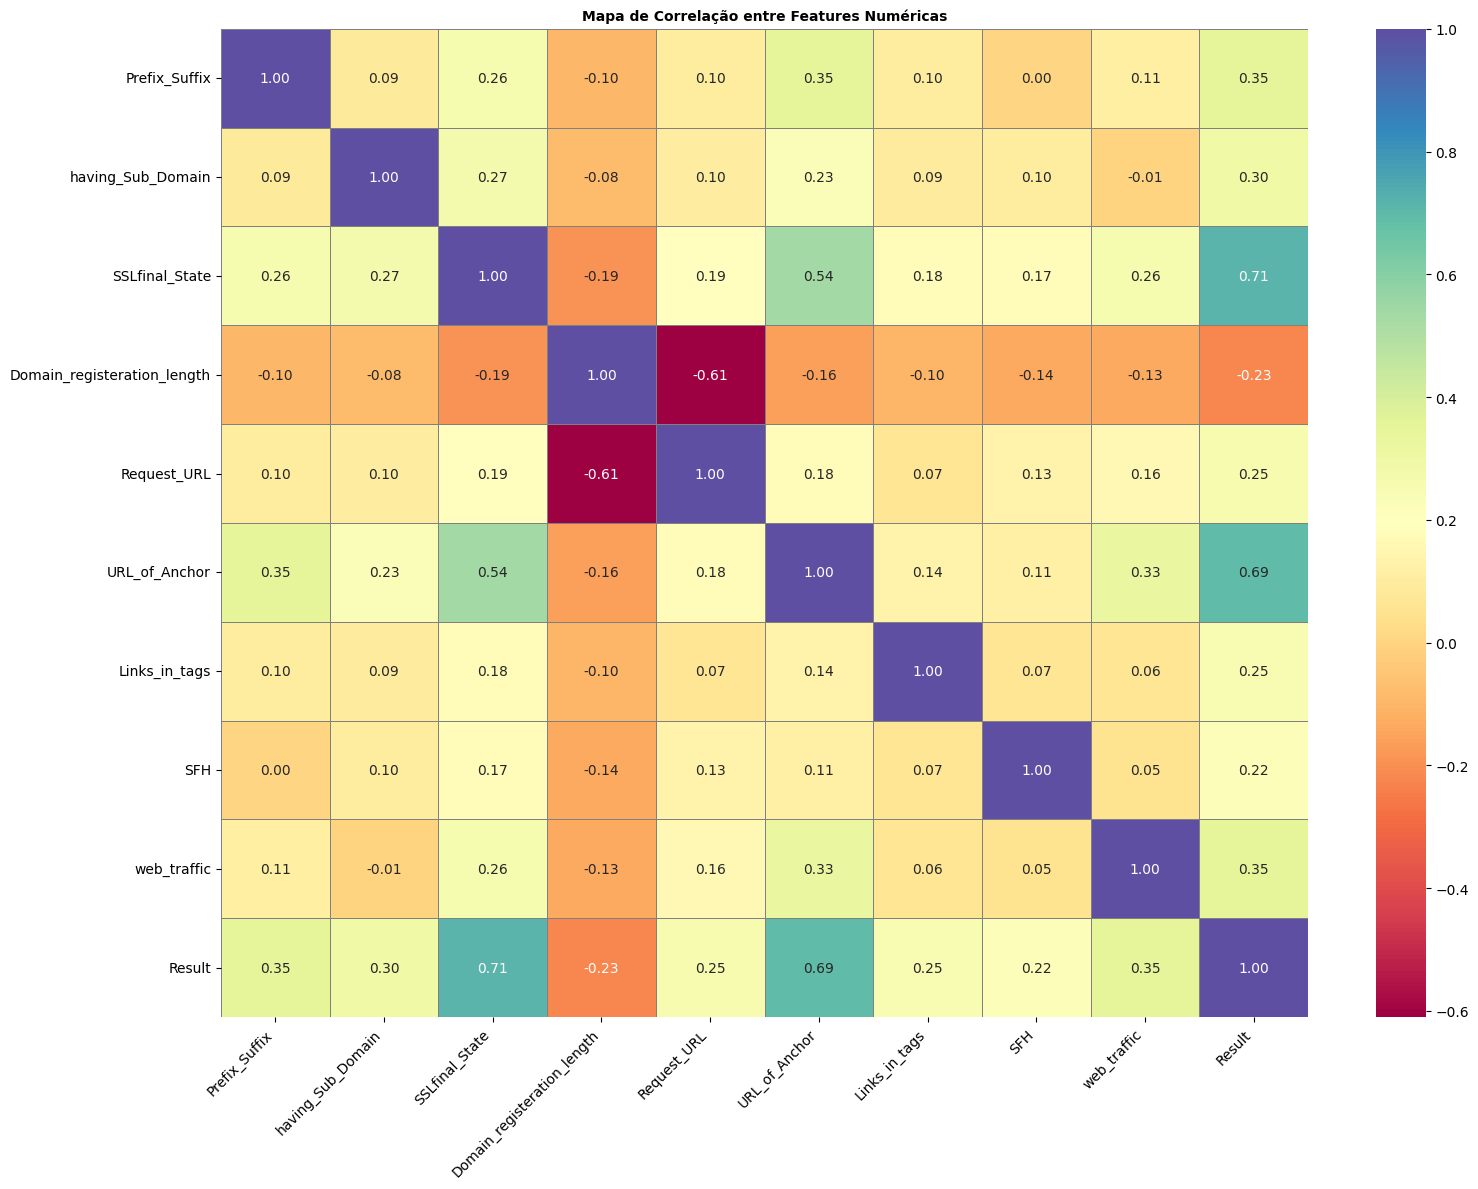

In [ ]:
#heatmap de corelacao

possible_tr_dt = df[columns_to_keep]

# Gera o heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(possible_tr_dt.corr(), cmap='Spectral', annot=True, fmt=".2f", linewidths=0.5, linecolor='gray')
plt.title("Mapa de Correlação entre Features Numéricas", fontsize=10, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Este heatmap apresenta a correlação entre as variáveis que possuem relação significativa com o rótulo Result, ou seja, aquelas com coeficiente de correlação maior que 0.20 ou menor que -0.20. Essa filtragem ajuda a focar nas features mais relevantes para a tarefa de classificação entre phishing e normal.

In [50]:
# Get correlation matrix
corr_matrix = df.corr()

# Get correlations with 'Result', excluding 'Result' itself
result_corr = corr_matrix['Result'].drop('Result')

# Top 3 positive correlations
top_3_pos = result_corr.sort_values(ascending=False).head(3)

# Top 1 negative correlation
top_1_neg = result_corr.sort_values().head(1)

# Combine into one list of features
selected_features = list(top_3_pos.index) + list(top_1_neg.index)
print("Selected features:", selected_features)

Selected features: ['SSLfinal_State', 'URL_of_Anchor', 'Prefix_Suffix', 'Domain_registeration_length']


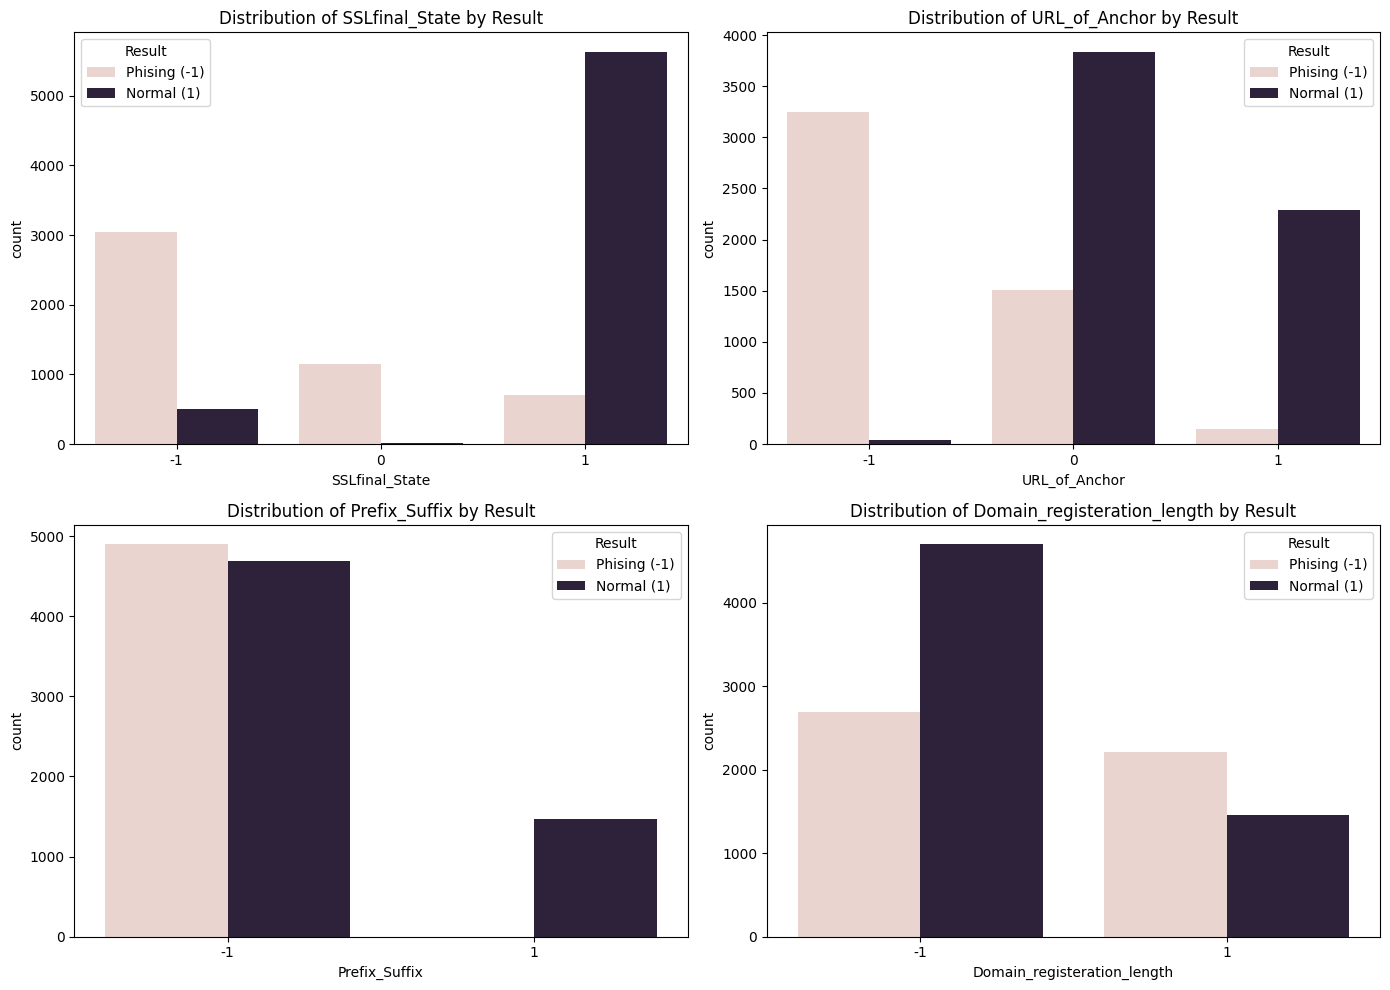

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Loop through selected features
for i, feature in enumerate(selected_features):
    
    sns.countplot(data=df, x=feature, hue='Result', ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by Result')
    axes[i].legend(title='Result', labels=['Phising (-1)', 'Normal (1)'])

plt.tight_layout()
plt.show()

In [ ]:
#Modelagem
#Nessta etapa Utilizaremos as clunas que geramos na variavel Collun_to_keep
#que apresentam uma Tanto uma corelacao possitiva alta e negative alta
#E como analizado na distribuicao apresentao uma distincao entre phishing e nromal

In [60]:
# Vamos agora carregar o dataset que iremos utilizar na variável np.
training_data = pd.read_csv(f'{currentWorkDir}/dados/Raw/phishing.csv')
training_data.columns = colunas
print(training_data) #para ver os dados na variável.

       having_IP_Address  URL_Length  Shortining_Service  having_At_Symbol  \
0                      1           1                   1                 1   
1                      1           0                   1                 1   
2                      1           0                   1                 1   
3                      1           0                  -1                 1   
4                     -1           0                  -1                 1   
...                  ...         ...                 ...               ...   
11049                  1          -1                   1                -1   
11050                 -1           1                   1                -1   
11051                  1          -1                   1                 1   
11052                 -1          -1                   1                 1   
11053                 -1          -1                   1                 1   

       double_slash_redirecting  Prefix_Suffix  having_Sub_Doma

In [93]:
#Utilizando as analizes anteriores e Coluns_to_keep vamos criar nosso teste
columns_to_keep = [col for col in columns_to_keep if col != 'Result']
inputs = training_data[columns_to_keep]
outputs = training_data['Result']

print(inputs.shape)
print(outputs.shape)
print(f"{'*'*8}Colunas Escolhidas{'*'*8}")
for column in inputs.columns:
    print(column)

(11054, 9)
(11054,)
********Colunas Escolhidas********
Prefix_Suffix
having_Sub_Domain
SSLfinal_State
Domain_registeration_length
Request_URL
URL_of_Anchor
Links_in_tags
SFH
web_traffic


In [106]:
# Dividindo o dataset em treino e teste. 
#training_inputs = inputs[:2000]
#training_outputs = outputs[:2000]
#testing_inputs = inputs[2000:]
#testing_outputs = outputs[2000:]

# dividing the dataset into training and testing:
training_inputs, testing_inputs, training_outputs, testing_outputs = model_selection.train_test_split(inputs, outputs, test_size=0.2)

print(training_inputs.shape)
print(testing_inputs.shape)
print(training_outputs.shape)
print(testing_outputs.shape)


(8843, 9)
(2211, 9)
(8843,)
(2211,)


In [107]:
# Preparando o classificador Scikit-learn do tipo regressão logística.
from sklearn.linear_model import LogisticRegression

classifier1 = LogisticRegression()


In [108]:
from sklearn.tree import DecisionTreeClassifier

classifier2 = DecisionTreeClassifier()


In [109]:
# Treinando os classificadores com todos o 
classifier1.fit(training_inputs, training_outputs)
classifier2.fit(training_inputs, training_outputs)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [110]:
# Fazendo as predições. 
predictions1 = classifier1.predict(testing_inputs)
predictions2 = classifier2.predict(testing_inputs)

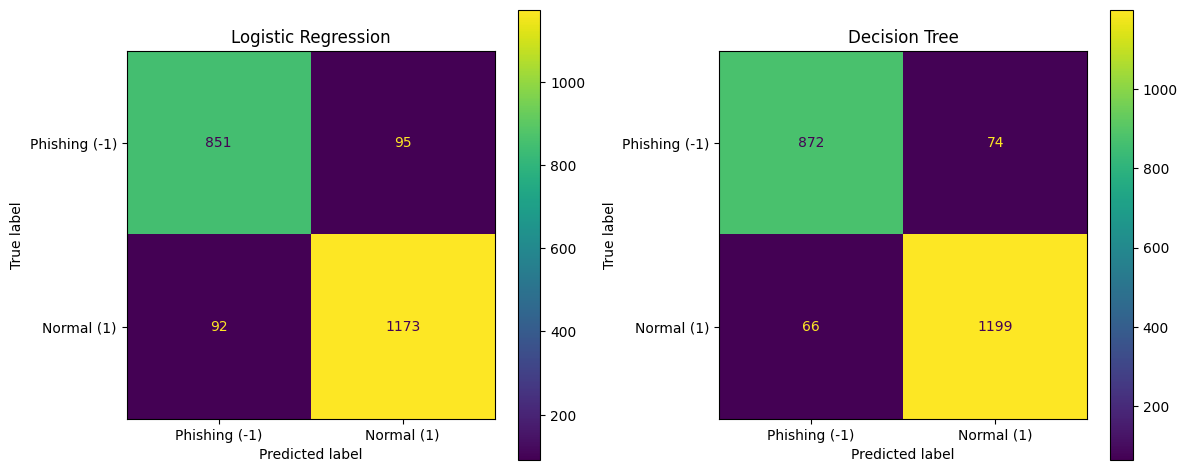

In [111]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Previsões dos modelos usando os dados de teste
predictions1 = classifier1.predict(testing_inputs)
predictions2 = classifier2.predict(testing_inputs)

# Matriz de confusão para cada modelo
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay(
    confusion_matrix(testing_outputs, predictions1),
    display_labels=['Phishing (-1)', 'Normal (1)']
).plot(ax=axes[0])
axes[0].set_title('Logistic Regression')

ConfusionMatrixDisplay(
    confusion_matrix(testing_outputs, predictions2),
    display_labels=['Phishing (-1)', 'Normal (1)']
).plot(ax=axes[1])
axes[1].set_title('Decision Tree')

plt.tight_layout()
plt.show()



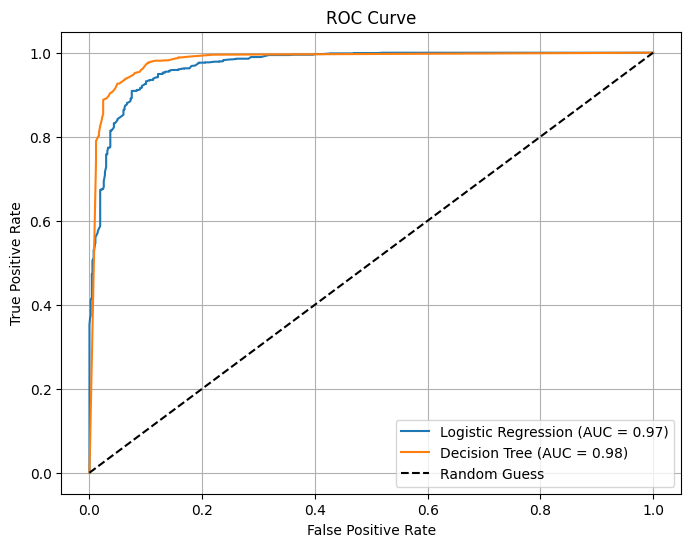

In [112]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Probabilidades preditas
y_score1 = classifier1.predict_proba(testing_inputs)[:, 1]
y_score2 = classifier2.predict_proba(testing_inputs)[:, 1]

# Curvas ROC
fpr1, tpr1, _ = roc_curve(testing_outputs, y_score1)
fpr2, tpr2, _ = roc_curve(testing_outputs, y_score2)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, label=f'Logistic Regression (AUC = {auc(fpr1, tpr1):.2f})')
plt.plot(fpr2, tpr2, label=f'Decision Tree (AUC = {auc(fpr2, tpr2):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [122]:
from sklearn.metrics import classification_report

# Classification report para Logistic Regression
print("📋 Classification Report — Logistic Regression")
print(classification_report(testing_outputs, predictions1, target_names=['Phishing (-1)', 'Normal (1)']))

# Classification report para Decision Tree
print("\n📋 Classification Report — Decision Tree")
print(classification_report(testing_outputs, predictions2, target_names=['Phishing (-1)', 'Normal (1)']))


📋 Classification Report — Logistic Regression
               precision    recall  f1-score   support

Phishing (-1)       0.90      0.90      0.90       946
   Normal (1)       0.93      0.93      0.93      1265

     accuracy                           0.92      2211
    macro avg       0.91      0.91      0.91      2211
 weighted avg       0.92      0.92      0.92      2211


📋 Classification Report — Decision Tree
               precision    recall  f1-score   support

Phishing (-1)       0.93      0.92      0.93       946
   Normal (1)       0.94      0.95      0.94      1265

     accuracy                           0.94      2211
    macro avg       0.94      0.93      0.94      2211
 weighted avg       0.94      0.94      0.94      2211



In [119]:
# Pipelines com hiperparâmetros diferentes
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipelines = {
    'Logistic (C=0.1)': Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(C=0.1, class_weight='balanced', solver='liblinear'))
    ]),
    'Logistic (C=1.0)': Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(C=1.0, class_weight='balanced', solver='liblinear'))
    ]),
    'DecisionTree (depth=3)': Pipeline([
        ('clf', DecisionTreeClassifier(max_depth=3, class_weight='balanced', random_state=12))
    ]),
    'DecisionTree (depth=5)': Pipeline([
        ('clf', DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=12))
    ])
}
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.2, random_state=19)


📋 Classification Report — Logistic (C=0.1)
               precision    recall  f1-score   support

Phishing (-1)       0.92      0.90      0.91       982
   Normal (1)       0.92      0.93      0.93      1229

     accuracy                           0.92      2211
    macro avg       0.92      0.92      0.92      2211
 weighted avg       0.92      0.92      0.92      2211


📋 Classification Report — Logistic (C=1.0)
               precision    recall  f1-score   support

Phishing (-1)       0.92      0.90      0.91       982
   Normal (1)       0.92      0.93      0.93      1229

     accuracy                           0.92      2211
    macro avg       0.92      0.92      0.92      2211
 weighted avg       0.92      0.92      0.92      2211


📋 Classification Report — DecisionTree (depth=3)
               precision    recall  f1-score   support

Phishing (-1)       0.89      0.90      0.90       982
   Normal (1)       0.92      0.91      0.92      1229

     accuracy                

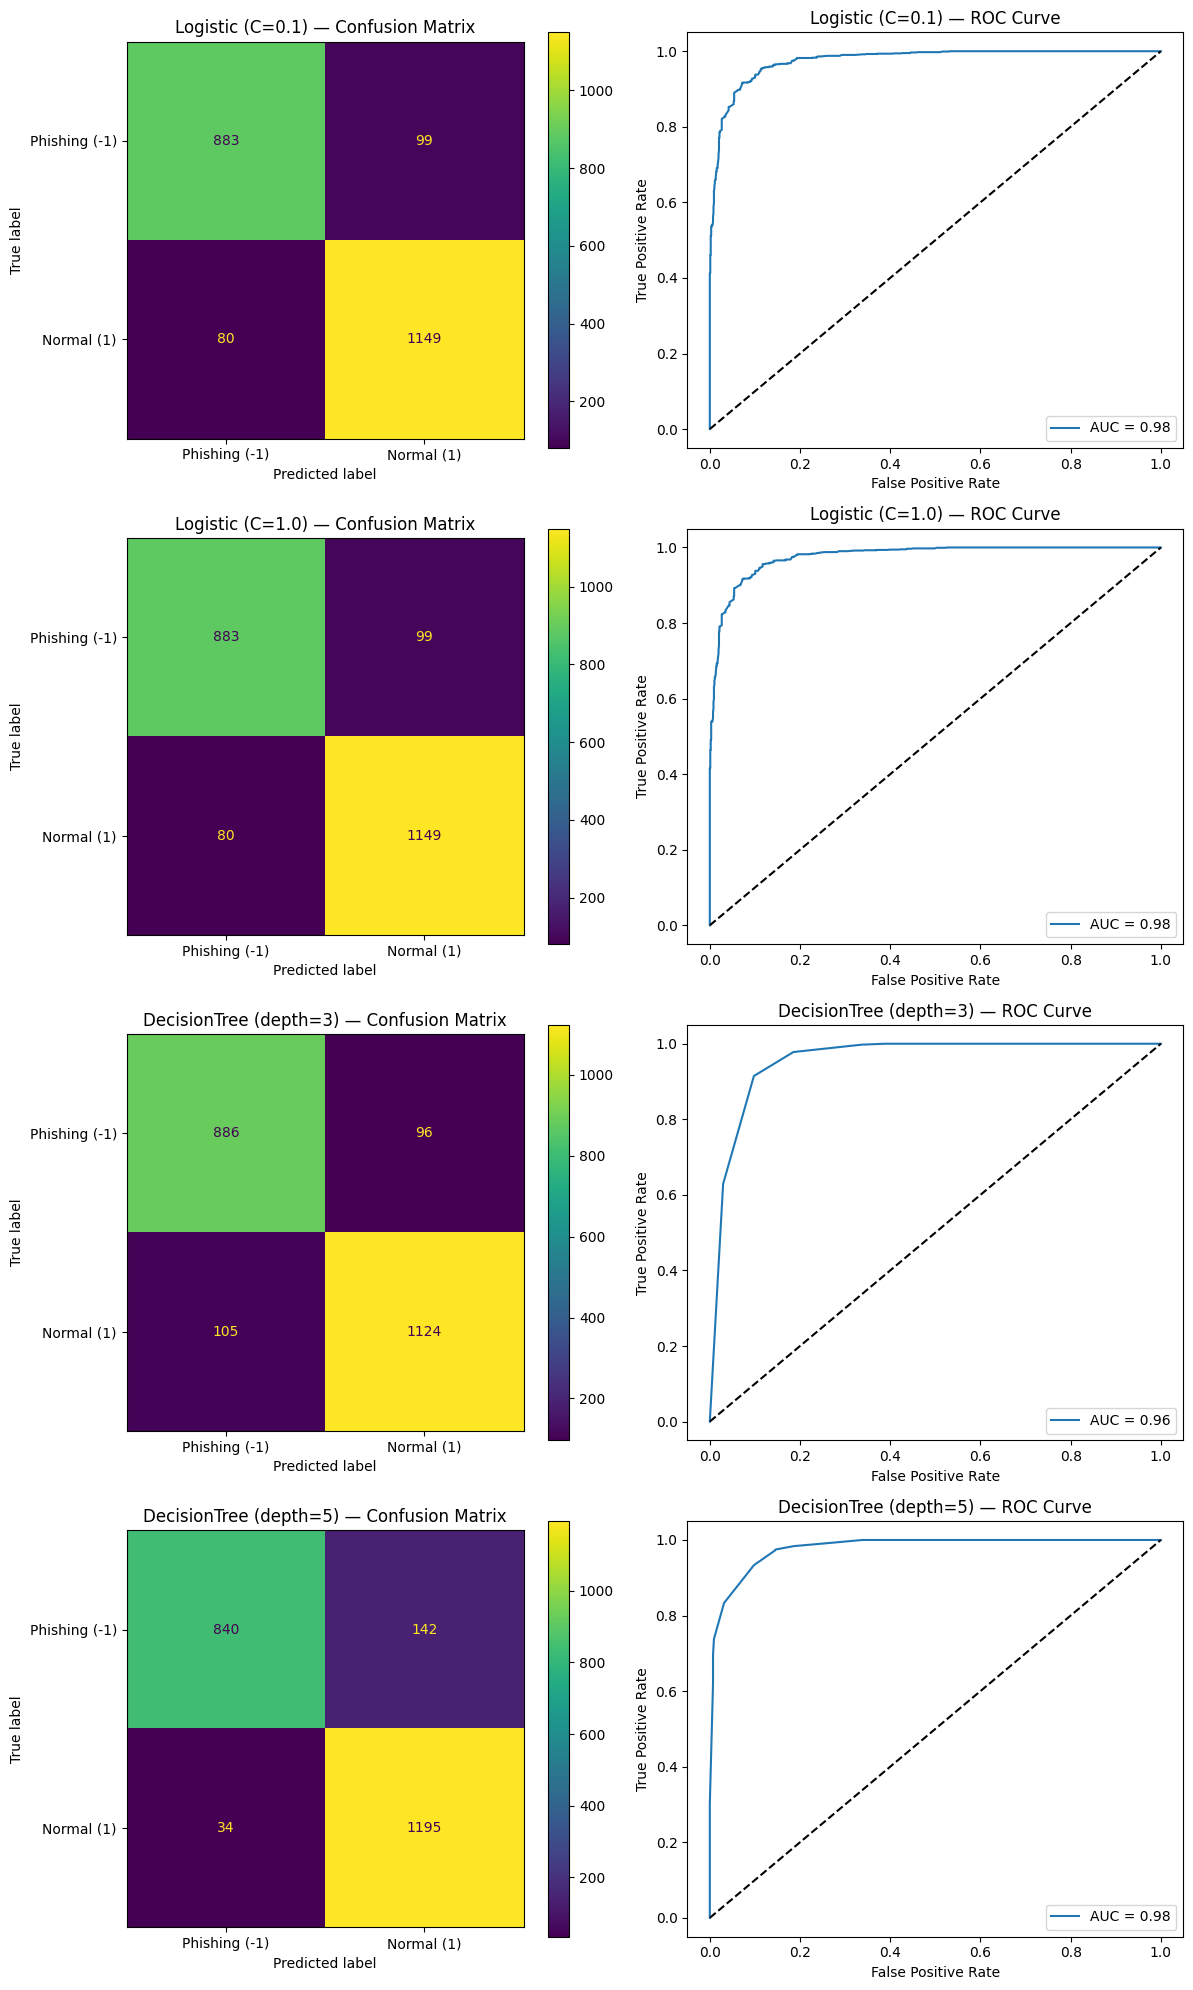

In [120]:
# Preparar visualizações
fig, axes = plt.subplots(len(pipelines), 2, figsize=(12, 5 * len(pipelines)))
axes = axes.reshape(len(pipelines), 2)

for i, (name, pipe) in enumerate(pipelines.items()):
    # Treinar e prever
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    # Probabilidades para ROC
    if hasattr(pipe.named_steps['clf'], 'predict_proba'):
        y_score = pipe.predict_proba(X_test)[:, 1]
    else:
        y_score = pipe.decision_function(X_test)

    # Matriz de confusão
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['Phishing (-1)', 'Normal (1)']).plot(ax=axes[i, 0])
    axes[i, 0].set_title(f'{name} — Confusion Matrix')

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    axes[i, 1].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    axes[i, 1].plot([0, 1], [0, 1], 'k--')
    axes[i, 1].set_title(f'{name} — ROC Curve')
    axes[i, 1].set_xlabel('False Positive Rate')
    axes[i, 1].set_ylabel('True Positive Rate')
    axes[i, 1].legend()

    # Classification report
    print(f"\n📋 Classification Report — {name}")
    print(classification_report(y_test, y_pred, target_names=['Phishing (-1)', 'Normal (1)']))

plt.tight_layout()
plt.show()


In [123]:
# Calculando a acurácia para o modelo de detecção de phishing.
accuracy1 = 100.0 * accuracy_score(testing_outputs, predictions1)
accuracy2 = 100.0 * accuracy_score(testing_outputs, predictions2)

In [124]:
# Imprimindo a acurácia para o modelo de detecção de phishing.
print ("A acurácia para o classificador de regressão logística sobre os dados de teste é: " +str(accuracy1))
print ("A acurácia para o classificador de árvore de decisão sobre os dados de teste é: " +str(accuracy2))

A acurácia para o classificador de regressão logística sobre os dados de teste é: 91.54228855721394
A acurácia para o classificador de árvore de decisão sobre os dados de teste é: 93.66802351876979
